<a href="https://colab.research.google.com/github/humantsattabhayya/SEOUL-BIKE-SHARING-PREDICTION-USING-REGRESSION-MODEL-MACHINE-LEARNING-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#***NAME :*** ***HUMANT SATTABHAYYA***

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>




































































































## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

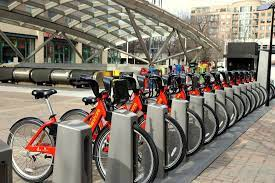

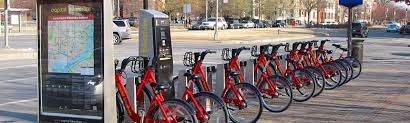

Rental Bike Sharing is the process by which bicycles are procured on several basis- hourly, weekly,membership-wise, etc. This phenomenon has seen its stockrise to considerable levels due to a global effort towards reducing the carbon footprint, leading to climate change,unprecedented natural disasters, ozone layer depletion,and other environmental anomalies.

In my project, I chose to analyse a dataset pertaining to Rental Bike Demand from South Koreancity of Seoul, comprising of climatic variables like Temperature, Humidity, Rainfall, Snowfall, Dew Point Temperature, and others. For the available raw data,firstly, a through pre-processing was done after which a Here, hourly rental bike count is the regress.


Bike sharing systems allow the users to take one way bicycle trips over short distances.Generally these systems are operated via automated kiosks to save manpower and reduce waiting time for the users. Bike Sharing System ensures that pollution is reduced as with use of bicycles there is reduction in use of motor vehicles which leads to reduction in emission of pollutants in the air. This practice of Bike Sharing Systems is common in Western Countries while the same is not seen yet in countries like India.In India most of the bike sharing systems could not achieve their maximum potential as data analysis was not used properly. The advantages of this system is that we can have public bike stations without any human involvement. Even local Chennai Municipal Corporation has invited biddings for a new bicycle sharing system.

Generally in bicycle sharing systems it is very important that the administrators should know how many cycles will be needed in each bicycle station, knowing this count enables them the arrange proper number of cycles at the stations and decide whether a particular station needs to have extra number of bicycle stands.So in this research work we study various prediction algorithms i.e. linear regression, decision trees, gradient boosting machines. This research work focuses on which algorithm can work better for the real world problem of bicycle sharing demand prediction.

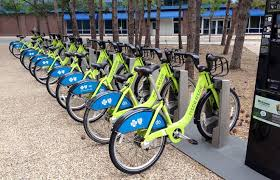

##**Business Goal:**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split

In [4]:
file='/content/drive/MyDrive/Alma better/Data/Copy of SeoulBikeData.csv'
csv=pd.read_csv(file,encoding='ISO-8859-1')
df=pd.DataFrame(csv)

In [5]:
df.head() 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [7]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,24/06/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
#finding null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**OBSERVATION:** There is no null values present in the dataset.

In [9]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [13]:
#getting summary
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [14]:
#converting the date column into year, day, month, weekday column. 
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month']= pd.DatetimeIndex(df['Date']).month
df['weekday']=pd.DatetimeIndex(df['Date']).weekday

In [15]:
df.shape

(8760, 18)

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [17]:
display(df['weekday'].unique())#getting unique values of week

array([3, 6, 2, 4, 0, 5, 1])

Weekday is in range 0-6 so we need to make it in normal 1-7.

In [18]:
#previously weekday values was in 0-6 now we are converting it into 1-7 format
df['weekday'] = np.array(df['weekday'])+1
display(df['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

##Exploratory Data Analysis (EDA)

Exploratory data analysis is an statistical way of understanding the data which is usually done in a visual way.The graphs plotted in explotary data analysis are for better understanding of data to the analyst.

Since we have to predict the number of bikes that will be rented, the best way to begin is with the variable to predict, "Rented Bike Count"

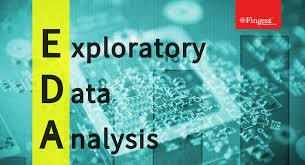

##**Demand of rented bikes at different times of years**

In [19]:
#creating data frame with year, month, day, weekday and rented bike count
Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)

In [20]:
Rented_bike_per_year

,Year,Rented Bike Count
0,2017,185330
1,2018,5986984


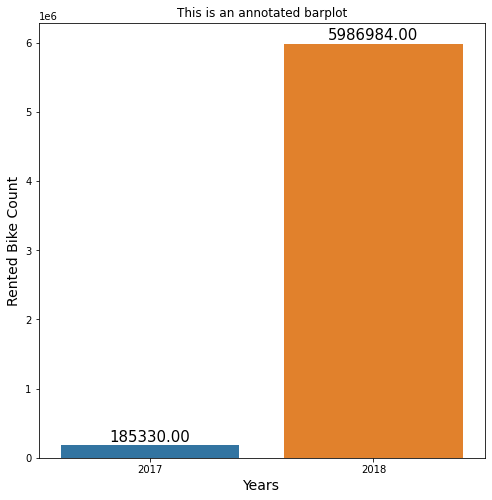

In [21]:
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_year['Year'] , y=Rented_bike_per_year['Rented Bike Count'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Years", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see in year 2018 the rented bike count was 5986984 which is greater than 2017. It is because this business was started in 2017 and after one year business got accelerated.

In [22]:
Rented_bike_per_month

,Month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


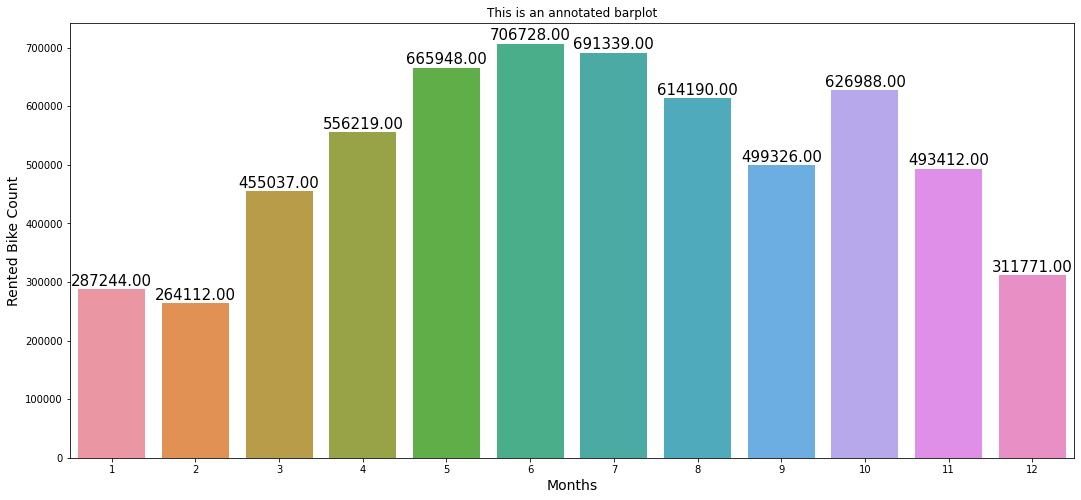

In [23]:
# Defining the plot size
plt.figure(figsize=(18, 8))

# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_month['Month'] , y=Rented_bike_per_month['Rented Bike Count'])

# Iterrating over the bars one-by-one
for bar in plots.patches:
	
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Months", size=14)

# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)

# Setting the title for the graph
plt.title("This is an annotated barplot")

# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see in 6th month or in june the rented bike count is 706728 which is highest and in 2nd month or in feb the count was lowest which is 264112.

In [24]:
Rented_bike_per_Day

,Day,Rented Bike Count
0,1,64062
1,2,53694
2,3,117813
3,4,170431
4,5,235021
5,6,371295
6,7,272954
7,8,247818
8,9,335006
9,10,210966


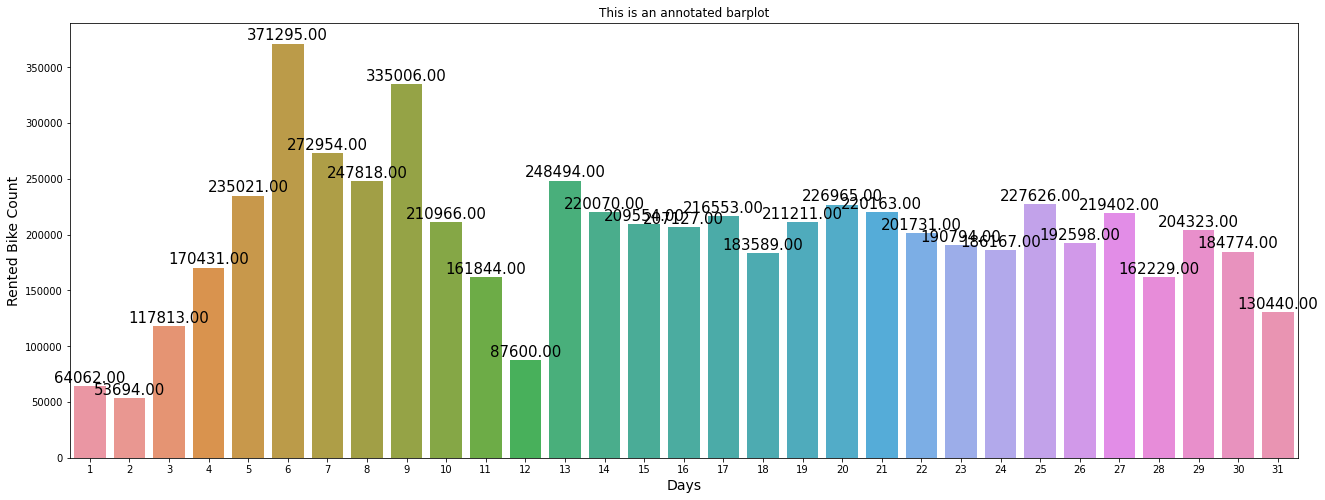

In [25]:
# Defining the plot size
plt.figure(figsize=(22, 8))

# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_Day['Day'] , y=Rented_bike_per_Day['Rented Bike Count'])

# Iterrating over the bars one-by-one
for bar in plots.patches:
	
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Days", size=14)

# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)

# Setting the title for the graph
plt.title("This is an annotated barplot")

# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see the rented bike count is highest on 6th day of the month which is 371295 and lowest on 2nd day of the month which is 53694.

In [27]:
Rented_bike_per_Weekday


,weekday,Rented Bike Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


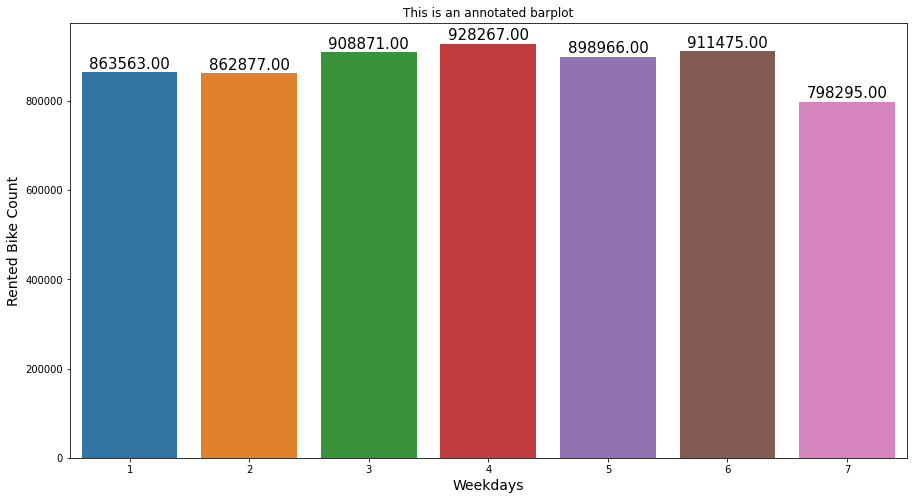

In [28]:
# Defining the plot size
plt.figure(figsize=(15, 8))

# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_Weekday['weekday'] , y=Rented_bike_per_Weekday['Rented Bike Count'])

# Iterrating over the bars one-by-one
for bar in plots.patches:
	
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Weekdays", size=14)

# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)

# Setting the title for the graph
plt.title("This is an annotated barplot")

# Fianlly showing the plot
plt.show()

**OBSERVATION:** Here we can see on 4th day of week the rented bike count is 928267 which is highest.